In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/David.jpg')
img.shape

(390, 300, 3)

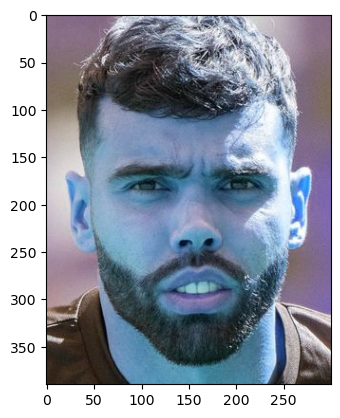

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(390, 300)

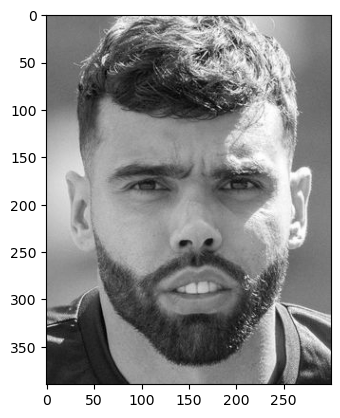

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 42,  98, 229, 229]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(42, 98, 229, 229)

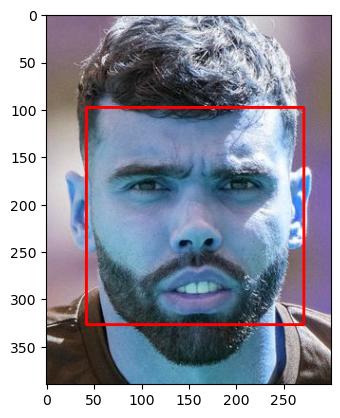

In [8]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
plt.imshow(face_img)

<function matplotlib.pyplot.show(close=None, block=None)>

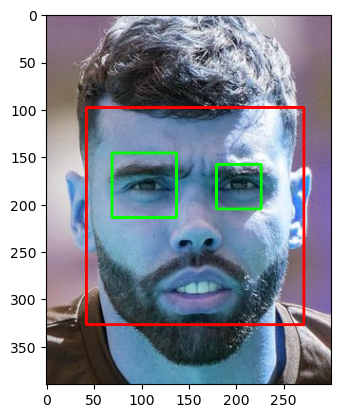

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew,ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show

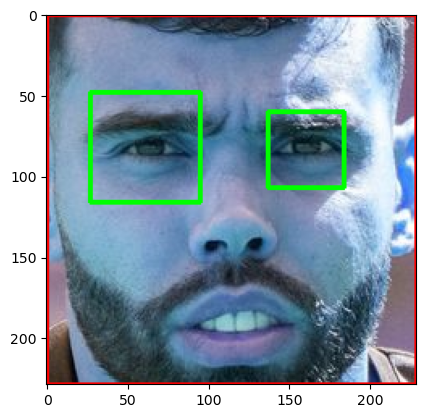

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap ='gray')

In [11]:
def get_cropped_image_if_2_eyes(img_path):
    if img_path.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.webp', '.txt')):
        img = cv2.imread(img_path)

        if img is not None:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
            for (x,y,w,h) in faces:
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = img[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi_gray)
                if len(eyes) >= 2:
                    return roi_color
        else:
            print("Error: Unable to read image at", img_path)
            return None
    else:
        print("Skipping non-image file:", img_path)
        return None


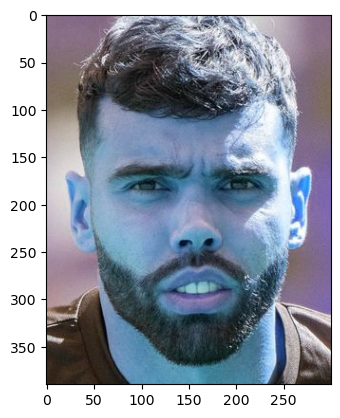

In [12]:
original_image = cv2.imread('./test_images/David.jpg')
plt.imshow(original_image)

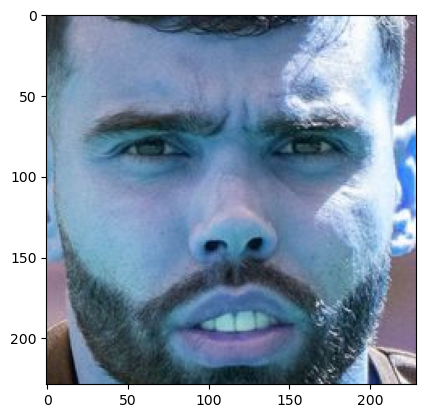

In [13]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/David.jpg')
plt.imshow(cropped_image)

In [14]:
#to test the function
cropped_images_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/David2.jpg')
cropped_images_no_2_eyes
#no printout because there are no eyes

In [15]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [16]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['./dataset/odegaard',
 './dataset/Timber',
 './dataset/Martinelli',
 './dataset/cropped',
 './dataset/Raya']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
char_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    char_name = img_dir.split('/')[-1]
    print(char_name)
    
    char_file_names_dict[char_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + char_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
            
            cropped_file_name = char_name + str(count) + '.png'  
            cropped_file_path = cropped_folder + '/'+ cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            char_file_names_dict[char_name].append(cropped_file_path)
            count +=1

odegaard
Generating cropped images in folder:  ./dataset/cropped/odegaard
Error: Unable to read image at ./dataset/odegaard/pageInfo.txt
Timber
Generating cropped images in folder:  ./dataset/cropped/Timber
Martinelli
Generating cropped images in folder:  ./dataset/cropped/Martinelli
cropped
Skipping non-image file: ./dataset/cropped/odegaard
Skipping non-image file: ./dataset/cropped/.DS_Store
Skipping non-image file: ./dataset/cropped/Timber
Skipping non-image file: ./dataset/cropped/Martinelli
Raya
Generating cropped images in folder:  ./dataset/cropped/Raya
Skipping non-image file: ./dataset/Raya/.DS_Store


In [20]:
char_file_names_dict


{'odegaard': ['./dataset/cropped/odegaard/odegaard1.png',
  './dataset/cropped/odegaard/odegaard2.png',
  './dataset/cropped/odegaard/odegaard3.png',
  './dataset/cropped/odegaard/odegaard4.png',
  './dataset/cropped/odegaard/odegaard5.png',
  './dataset/cropped/odegaard/odegaard6.png',
  './dataset/cropped/odegaard/odegaard7.png',
  './dataset/cropped/odegaard/odegaard8.png',
  './dataset/cropped/odegaard/odegaard9.png',
  './dataset/cropped/odegaard/odegaard10.png',
  './dataset/cropped/odegaard/odegaard11.png',
  './dataset/cropped/odegaard/odegaard12.png',
  './dataset/cropped/odegaard/odegaard13.png',
  './dataset/cropped/odegaard/odegaard14.png',
  './dataset/cropped/odegaard/odegaard15.png',
  './dataset/cropped/odegaard/odegaard16.png',
  './dataset/cropped/odegaard/odegaard17.png',
  './dataset/cropped/odegaard/odegaard18.png',
  './dataset/cropped/odegaard/odegaard19.png',
  './dataset/cropped/odegaard/odegaard20.png',
  './dataset/cropped/odegaard/odegaard21.png',
  './datas

In [21]:
#feature Engineering

In [22]:
import numpy as np
import pywt
import cv2

def w2d(img, mode = 'haar', level=1):
    imArray = img
    #datatype conversions
    #converting to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray/= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process Coefficients 
    coeffs_H=list(coeffs)
    coeffs_H[0]*= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H
        

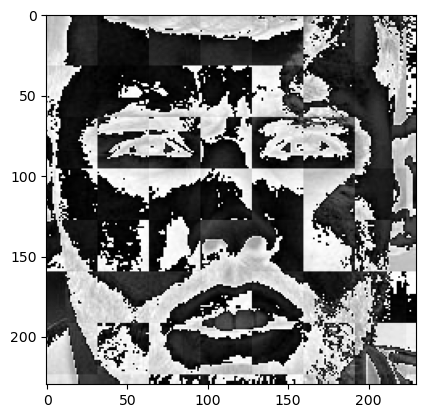

In [23]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [24]:
char_file_names_dict

{'odegaard': ['./dataset/cropped/odegaard/odegaard1.png',
  './dataset/cropped/odegaard/odegaard2.png',
  './dataset/cropped/odegaard/odegaard3.png',
  './dataset/cropped/odegaard/odegaard4.png',
  './dataset/cropped/odegaard/odegaard5.png',
  './dataset/cropped/odegaard/odegaard6.png',
  './dataset/cropped/odegaard/odegaard7.png',
  './dataset/cropped/odegaard/odegaard8.png',
  './dataset/cropped/odegaard/odegaard9.png',
  './dataset/cropped/odegaard/odegaard10.png',
  './dataset/cropped/odegaard/odegaard11.png',
  './dataset/cropped/odegaard/odegaard12.png',
  './dataset/cropped/odegaard/odegaard13.png',
  './dataset/cropped/odegaard/odegaard14.png',
  './dataset/cropped/odegaard/odegaard15.png',
  './dataset/cropped/odegaard/odegaard16.png',
  './dataset/cropped/odegaard/odegaard17.png',
  './dataset/cropped/odegaard/odegaard18.png',
  './dataset/cropped/odegaard/odegaard19.png',
  './dataset/cropped/odegaard/odegaard20.png',
  './dataset/cropped/odegaard/odegaard21.png',
  './datas

In [25]:
class_dict = {
    char_name: count for count, char_name in enumerate(char_file_names_dict.keys())
}
class_dict


{'odegaard': 0, 'Timber': 1, 'Martinelli': 2, 'cropped': 3, 'Raya': 4}

In [26]:
X = []
y = []

for char_name, training_files in char_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))

        X.append(combined_img)
        y.append(class_dict[char_name])


In [27]:
len(X)

171

In [28]:
len(X[0])

4096

In [29]:
#reshaping X
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(171, 4096)

In [30]:
X[0]

array([129., 146., 170., ..., 210., 237., 232.])

In [31]:
#building models

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

0.7674418604651163

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       0.88      0.70      0.78        10
           2       0.67      0.71      0.69        14
           4       1.00      0.62      0.77         8

    accuracy                           0.77        43
   macro avg       0.82      0.76      0.77        43
weighted avg       0.79      0.77      0.76        43



In [66]:
#i think i can get a better score with a different model, so i will use gridsearch cv for model parameter tunning

In [58]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [63]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma = 'auto', probability=True),
        'params': {
            'svc__C': [0.1, 1,10],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class = 'auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [65]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append(
    {
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


,model,best_score,best_params
0,svm,0.766154,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.594462,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.735077,{'logisticregression__C': 1}


In [ ]:
#Turns out svm is the best model

In [71]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [68]:
best_estimators['svm'].score(X_test, y_test)

0.7674418604651163

In [69]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.7906976744186046

In [70]:
'''Wait, when obserevd Logitsic Regression is doing better on 
Test data so it most likely Logistic regression 
does better in production. but if we do the proportion in experimental stage and production stage

'Wait, when obserevd Logitsic Regression is doing better on \nTest data so it most likely Logistic regression \ndoes better in production. we still have to compare the scores in training stage and testing stage to see the proportion of precision\n'

In [72]:
#using confusion matrix

In [75]:
best_clf = best_estimators['svm']

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0,  0],
       [ 1,  7,  2,  0],
       [ 3,  1, 10,  0],
       [ 0,  0,  3,  5]])

Text(70.72222222222221, 0.5, 'True')

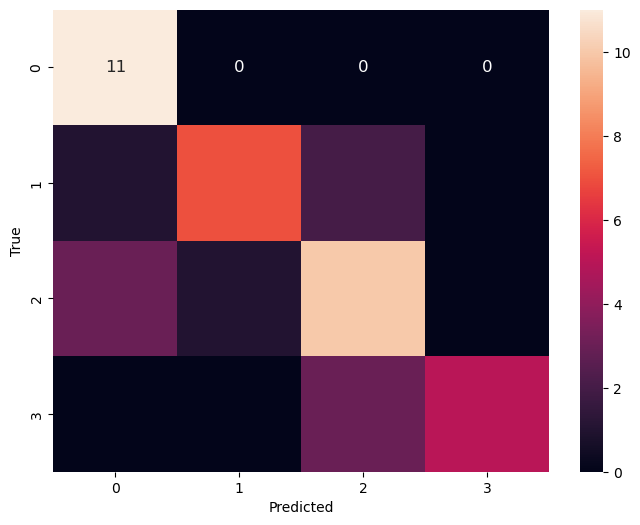

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, annot_kws={"size": 12})
plt.xlabel("Predicted")
plt.ylabel("True")


In [99]:
class_dict

{'odegaard': 0, 'Timber': 1, 'Martinelli': 2, 'cropped': 3, 'Raya': 4}

In [100]:
#Saving the model
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [101]:
#Saving class dictionary
import json
with open("class_dictionary.json", 'w') as f:
    f.write(json.dumps(class_dict))